In [1]:
import sys
from pathlib import Path

# 1. Se obtiena  la ruta de la carpeta raíz del proyecto, que es donde están los archivos .py y .parent nos sube un nivel a la raíz del proyecto
root_path = Path.cwd().parent 

# 2. Agregamos la carpeta donde están los archivos .py al sys.path
sys.path.append(str(root_path / "src"))

# Ahora sí, Python encontrará tus módulos sin importar dónde lances el notebook
from Cargar_datos import cargar_datos
from ft_engineering import feature_engineering
from modeling import train_and_evaluate_models

df = cargar_datos()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tipo_credito                   10763 non-null  int64         
 1   fecha_prestamo                 10763 non-null  datetime64[ns]
 2   capital_prestado               10763 non-null  float64       
 3   plazo_meses                    10763 non-null  int64         
 4   edad_cliente                   10763 non-null  int64         
 5   tipo_laboral                   10763 non-null  object        
 6   salario_cliente                10763 non-null  int64         
 7   total_otros_prestamos          10763 non-null  int64         
 8   cuota_pactada                  10763 non-null  int64         
 9   puntaje                        10763 non-null  float64       
 10  puntaje_datacredito            10757 non-null  float64       
 11  cant_creditosvi

In [2]:
X_train, X_test, y_train, y_test, preprocessor = feature_engineering(df)

results_df, trained_models = train_and_evaluate_models(
    X_train, X_test, y_train, y_test, preprocessor
)

results_df



,model,accuracy,precision,recall,f1,roc_auc
0,logistic,0.998452,0.999025,0.99935,0.999187,0.999968
1,random_forest,1.000000,1.000000,1.00000,1.000000,1.000000
2,gradient_boosting,1.000000,1.000000,1.00000,1.000000,1.000000


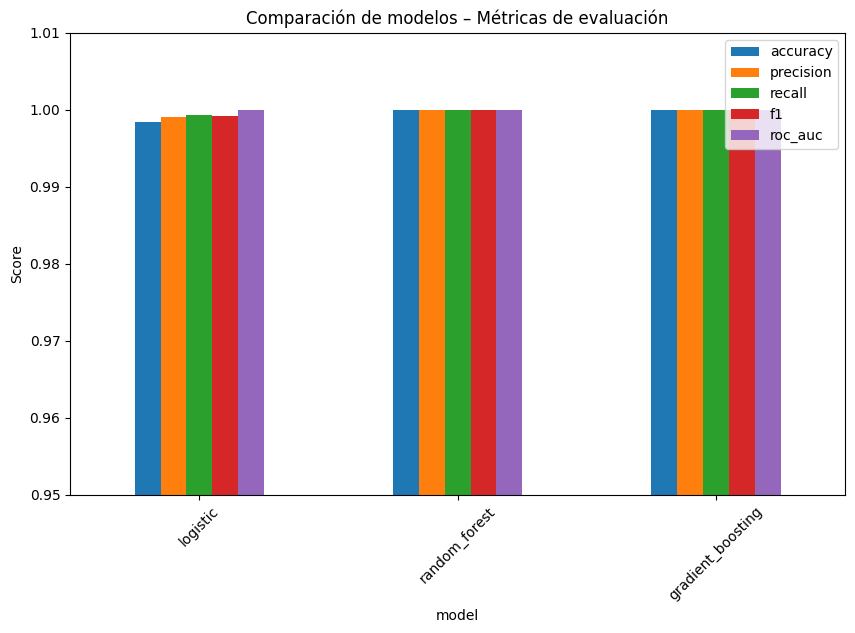

In [4]:
import matplotlib.pyplot as plt

metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]

results_df.set_index("model")[metrics].plot(
    kind="bar",
    figsize=(10, 6),
    title="Comparación de modelos – Métricas de evaluación"
)

plt.ylabel("Score")
plt.xticks(rotation=45)
plt.ylim(0.95, 1.01)
plt.show()

## Selección del modelo

A partir de la evaluación de los modelos entrenados, se observa que todos presentan métricas extremadamente altas, lo que indica una alta capacidad predictiva del conjunto de variables utilizado.

Si bien los modelos basados en árboles alcanzan métricas perfectas, se selecciona la Regresión Logística como modelo final debido a su menor complejidad, mayor interpretabilidad y desempeño prácticamente equivalente, reduciendo el riesgo de sobreajuste y facilitando su despliegue en producción.

Es importante destacar que la altísima performance observada podría estar influenciada por la presencia de variables altamente correlacionadas con la variable objetivo —como el puntaje crediticio. Esto deberá ser analizado en futuras iteraciones del modelo.



In [5]:
best_model = trained_models["logistic"]

from modeling import save_best_model

save_best_model(best_model, preprocessor)